In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('data/train_data.csv', parse_dates=['time'])

In [3]:
data

,time,Measure,kWh,label
0,2022-01-03 00:00:00,Mech_Svc_AHU,8.0000,unclassified
1,2022-01-03 00:00:00,FB3 - Main 3L,38.4500,unclassified
2,2022-01-03 00:00:00,BS3 - Main 3L,60.5000,unclassified
3,2022-01-03 00:00:00,BS2 - Main 2L,13.0000,unclassified
4,2022-01-03 00:00:00,Sub - Feeder F10,164.2500,unclassified
...,...,...,...,...
747851,2022-11-07 03:30:00,Mech_Svc_AHU,5.1250,unclassified
747852,2022-11-07 03:45:00,Mech_Svc_AHU,5.8125,unclassified
747853,2022-11-07 04:00:00,Mech_Svc_AHU,6.5000,unclassified
747854,2022-11-07 04:15:00,Mech_Svc_AHU,6.8125,unclassified


In [4]:
data.describe()

,kWh
count,742392.000000
mean,207.860686
std,547.166451
min,0.000000
25%,9.353577
50%,60.375000
75%,156.562500
max,10250.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747856 entries, 0 to 747855
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   time     747856 non-null  datetime64[ns]
 1   Measure  747856 non-null  object        
 2   kWh      742392 non-null  float64       
 3   label    747856 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 22.8+ MB


In [6]:
# Number of null entries in data
data.isna().sum()

time          0
Measure       0
kWh        5464
label         0
dtype: int64

In [7]:
type(data['time'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [8]:
data['day'] = data['time'].dt.day
data['month'] = data['time'].dt.month
data['year'] = data['time'].dt.year

In [9]:
data.head()

,time,Measure,kWh,label,day,month,year
0,2022-01-03,Mech_Svc_AHU,8.00,unclassified,3,1,2022
1,2022-01-03,FB3 - Main 3L,38.45,unclassified,3,1,2022
2,2022-01-03,BS3 - Main 3L,60.50,unclassified,3,1,2022
3,2022-01-03,BS2 - Main 2L,13.00,unclassified,3,1,2022
4,2022-01-03,Sub - Feeder F10,164.25,unclassified,3,1,2022


In [10]:
# 5 different types of labels
data['label'].unique()

array(['unclassified', 'Non-production', 'Production', 'Power-up',
       'Power-down'], dtype=object)

In [11]:
print('Following are category types in Measure column: ', '\n', data['Measure'].unique())
print('\n')
print('The number of unique values in Measure column:', data['Measure'].nunique())

Following are category types in Measure column:  
 ['Mech_Svc_AHU' 'FB3 - Main 3L' 'BS3 - Main 3L' 'BS2 - Main 2L'
 'Sub - Feeder F10' 'BS2 - Main 2R' 'BS4 - Main 4L' 'AB1 - Main 1L'
 'Sub - Feeder F01' 'BS3 - Main 3R' 'BS1 - Main 1L' 'AB3 - Main 3R'
 'AB2 - Main 2R' 'Sub - Feeder F08' 'BS4 - Main 4R' 'MSB1 - Main 1L'
 'Paint_AHU' 'Sub - Feeder F03' 'Sub - Feeder F02' 'Sub - Feeder F04'
 'AB3 - Main 3L' 'FB1 - Main 1L' 'Sub - Main M2']


The number of unique values in Measure column: 23


In [12]:
# Value counts of each specific label type
data['label'].value_counts()

unclassified      651101
Non-production     34727
Production         31000
Power-down         16489
Power-up           14539
Name: label, dtype: int64

In [13]:
# 5 different data frames created whkch have only 1 category of labels

unclassified = data.loc[data['label'] == 'unclassified'].reset_index()
non_production = data.loc[data['label'] == 'Non-production'].reset_index()
production = data.loc[data['label'] == 'Production'].reset_index()
power_down = data.loc[data['label'] == 'Power-down'].reset_index()
power_up = data.loc[data['label'] == 'Power-up'].reset_index()

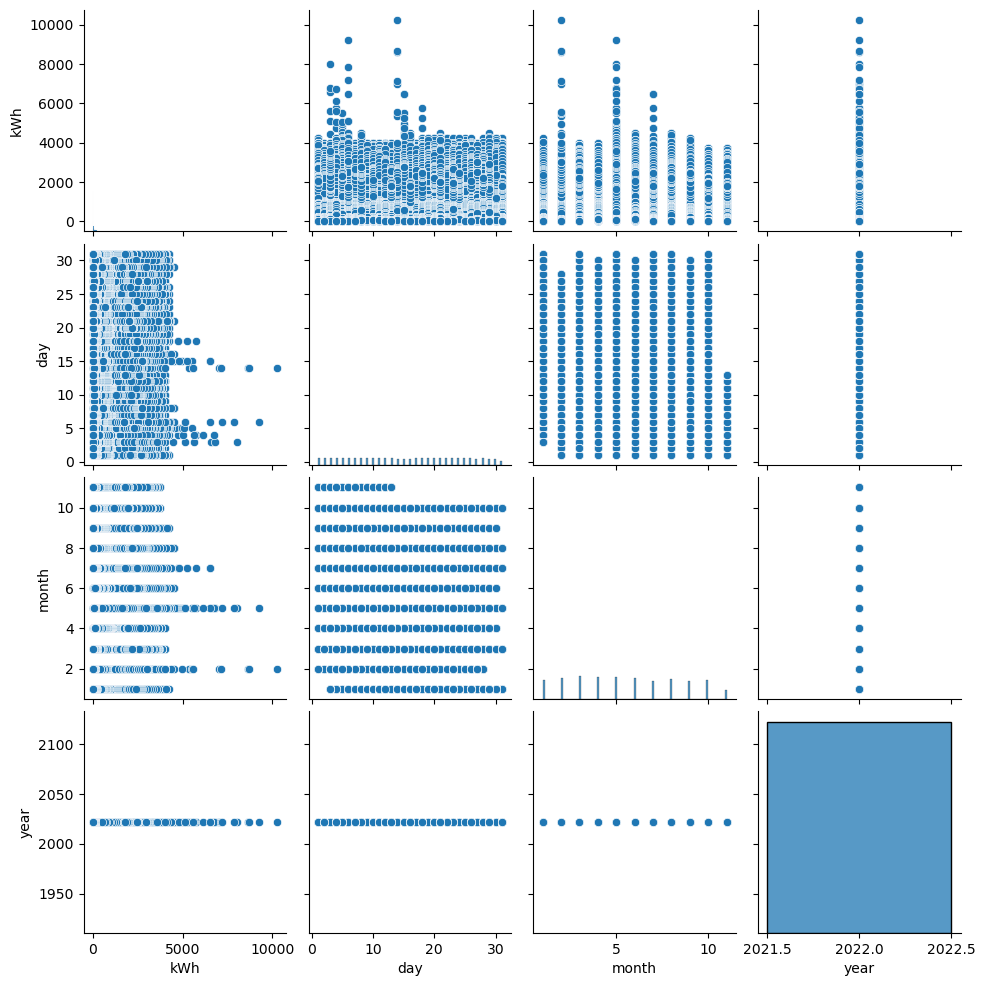

In [14]:
sns.pairplot(data)

<Axes: xlabel='label', ylabel='kWh'>

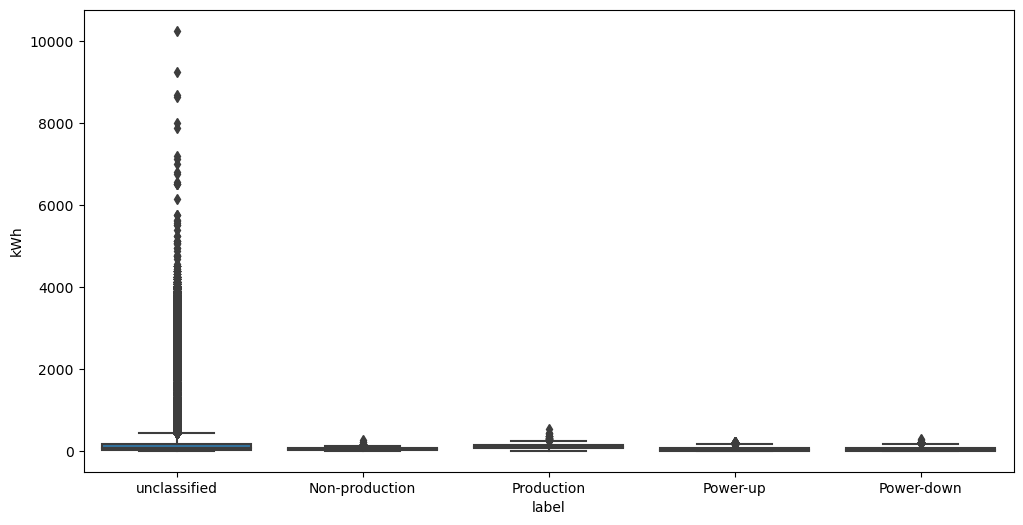

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data, x='label', y='kWh')

In [16]:
Q1_unclassified = unclassified['kWh'].quantile(q=0.25)
Q3_unclassified = unclassified['kWh'].quantile(q=0.75)
IQR_unclassified = Q3_unclassified - Q1_unclassified

Q1_non_production = non_production['kWh'].quantile(q=0.25)
Q3_non_production = non_production['kWh'].quantile(q=0.75)
IQR_non_production = Q3_non_production - Q1_non_production

Q1_production = production['kWh'].quantile(q=0.25)
Q3_production = production['kWh'].quantile(q=0.75)
IQR_production = Q3_production - Q1_production

Q1_power_down = power_down['kWh'].quantile(q=0.25)
Q3_power_down = power_down['kWh'].quantile(q=0.75)
IQR_power_down = Q3_power_down - Q1_power_down

Q1_power_up = power_up['kWh'].quantile(q=0.25)
Q3_power_up = power_up['kWh'].quantile(q=0.75)
IQR_power_up = Q3_power_up - Q1_power_up

print(f"Number of outlier points for unclassified labels: {((unclassified['kWh'] < (Q1_unclassified - 1.5 * IQR_unclassified)) | (unclassified['kWh'] > (Q3_unclassified + 1.5 * IQR_unclassified))).sum()}")
print(f"Number of outlier points for Non-production labels: {((non_production['kWh'] < (Q1_non_production - 1.5 * IQR_non_production)) | (non_production['kWh'] > (Q3_non_production + 1.5 * IQR_non_production))).sum()}")
print(f"Number of outlier points for Production labels: {((production['kWh'] < (Q1_production - 1.5 * IQR_production)) | (production['kWh'] > (Q3_production + 1.5 * IQR_production))).sum()}")
print(f"Number of outlier points for Power-up labels: {((power_up['kWh'] < (Q1_power_up - 1.5 * IQR_power_up)) | (power_up['kWh'] > (Q3_power_up + 1.5 * IQR_power_up))).sum()}")
print(f"Number of outlier points for Power-down labels: {((power_down['kWh'] < (Q1_power_down - 1.5 * IQR_power_down)) | (power_down['kWh'] > (Q3_power_down + 1.5 * IQR_power_down))).sum()}")

Number of outlier points for unclassified labels: 64267
Number of outlier points for Non-production labels: 223
Number of outlier points for Production labels: 29
Number of outlier points for Power-up labels: 123
Number of outlier points for Power-down labels: 63


In [17]:
data['kWh'].dropna(inplace=True)
data

,time,Measure,kWh,label,day,month,year
0,2022-01-03 00:00:00,Mech_Svc_AHU,8.0000,unclassified,3,1,2022
1,2022-01-03 00:00:00,FB3 - Main 3L,38.4500,unclassified,3,1,2022
2,2022-01-03 00:00:00,BS3 - Main 3L,60.5000,unclassified,3,1,2022
3,2022-01-03 00:00:00,BS2 - Main 2L,13.0000,unclassified,3,1,2022
4,2022-01-03 00:00:00,Sub - Feeder F10,164.2500,unclassified,3,1,2022
...,...,...,...,...,...,...,...
747851,2022-11-07 03:30:00,Mech_Svc_AHU,5.1250,unclassified,7,11,2022
747852,2022-11-07 03:45:00,Mech_Svc_AHU,5.8125,unclassified,7,11,2022
747853,2022-11-07 04:00:00,Mech_Svc_AHU,6.5000,unclassified,7,11,2022
747854,2022-11-07 04:15:00,Mech_Svc_AHU,6.8125,unclassified,7,11,2022


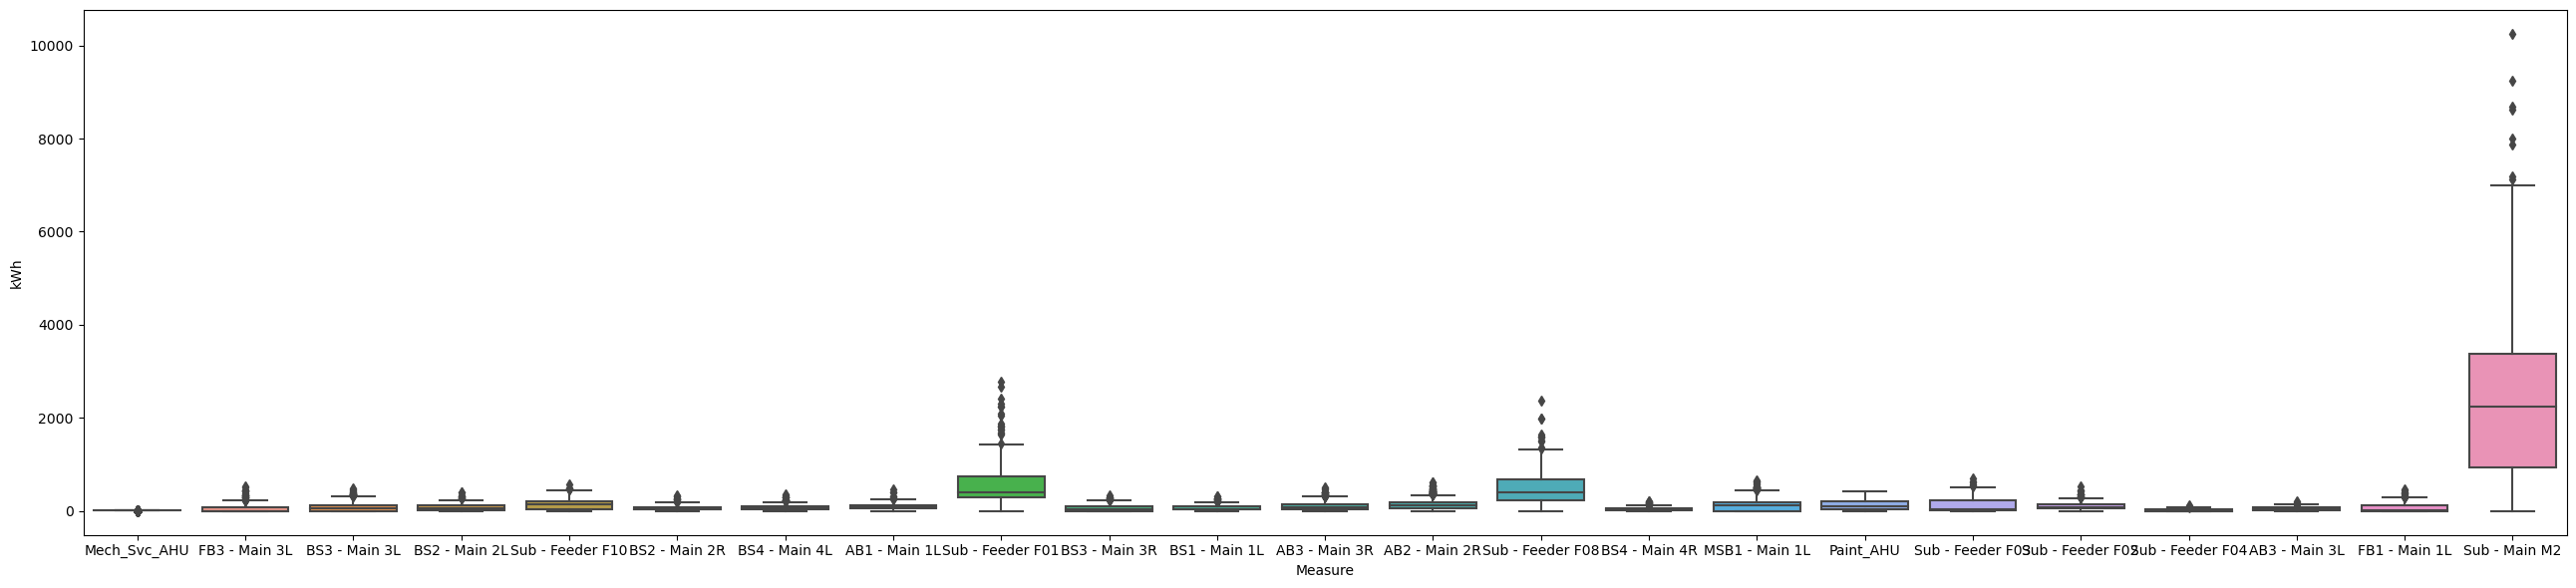

In [22]:
plt.figure(figsize=(26,6))
sns.boxplot(data=data, x='Measure', y='kWh')
plt.tight_layout()

In [31]:
import datetime

<Axes: xlabel='time'>

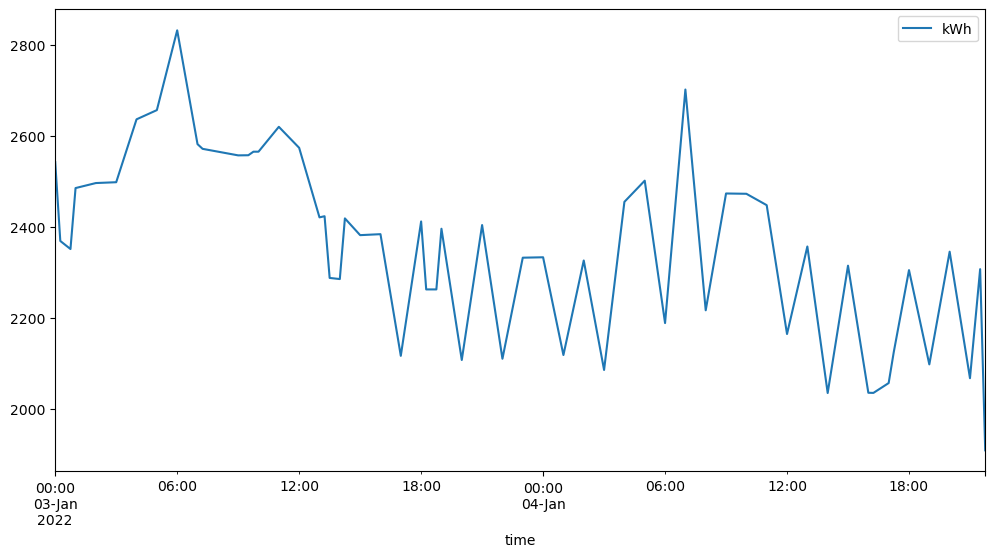

In [63]:
# start_date = data['time'].iloc[0]
# end_date = data['time'].iloc[100]
# data[(data.loc['time'] <=start_date) & (data.loc['time'] <= end_date)].plot()
# type(data['time'][0])
# print(start_date)
# print(end_date)

data[['time', 'kWh']].iloc[:4200].groupby('time').sum().plot(figsize=(12,6))

In [64]:
from sklearn.cluster import KMeans

In [65]:
kmeans = KMeans(n_clusters=4)

In [73]:
X = data[['time', 'kWh']].groupby('time').mean()
X

,kWh
time,
2022-01-03 00:00:00,115.532955
2022-01-03 00:15:00,109.891033
2022-01-03 00:30:00,109.272283
2022-01-03 00:45:00,108.653533
2022-01-03 01:00:00,112.945455
...,...
2022-11-13 22:45:00,153.368370
2022-11-13 23:00:00,155.775978
2022-11-13 23:15:00,153.610217


In [79]:
X['avg_three'] = X['kWh'].rolling(3).mean()
X

,kWh,avg_three
time,,
2022-01-03 00:00:00,115.532955,NaN
2022-01-03 00:15:00,109.891033,NaN
2022-01-03 00:30:00,109.272283,111.565423
2022-01-03 00:45:00,108.653533,109.272283
2022-01-03 01:00:00,112.945455,110.290423
...,...,...
2022-11-13 22:45:00,153.368370,150.960761
2022-11-13 23:00:00,155.775978,153.368370
2022-11-13 23:15:00,153.610217,154.251522


In [82]:
kmeans = kmeans.fit(X.dropna())

C:\Users\lenovo\anaconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [83]:
predictions = kmeans.predict(X.dropna())

In [85]:
kmeans.cluster_centers_

array([[171.69564727, 171.97619084],
       [342.20817306, 341.65738759],
       [115.60366514, 115.88771038],
       [286.01372733, 285.74852054]])

<Axes: xlabel='kWh', ylabel='avg_three'>

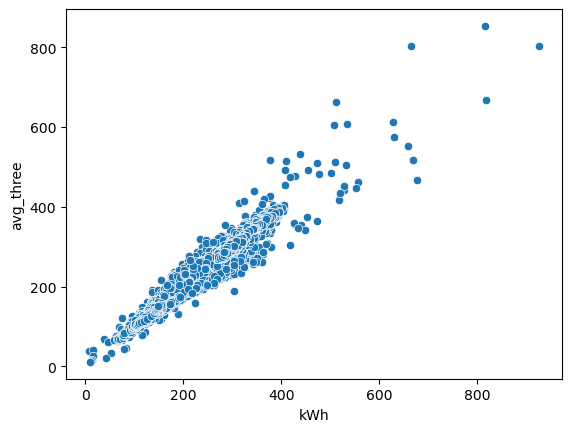

In [86]:
sns.scatterplot(data=X, x='kWh', y='avg_three')

In [ ]:
sns.scatterplot(data=X, x='kWh', y=predictions.)